In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import xgboost as xgb
import lightgbm as lgbm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
df = pd.read_csv("model_imputed_df.csv")
df.head()
model_cols = ["host_response_rate", "host_acceptance_rate", "latitude", 
              "longitude", "accommodates", "beds", "number_of_reviews", 
              "number_of_reviews_ltm", "review_scores_rating", 
              "reviews_per_month", "bathrooms", "price"]
model_df = df[model_cols]
model_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253798 entries, 0 to 253797
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   host_response_rate     253798 non-null  float64
 1   host_acceptance_rate   253798 non-null  float64
 2   latitude               253798 non-null  float64
 3   longitude              253798 non-null  float64
 4   accommodates           253798 non-null  int64  
 5   beds                   253798 non-null  float64
 6   number_of_reviews      253798 non-null  int64  
 7   number_of_reviews_ltm  253798 non-null  int64  
 8   review_scores_rating   199763 non-null  float64
 9   reviews_per_month      199638 non-null  float64
 10  bathrooms              73113 non-null   float64
 11  price                  253798 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 23.2 MB


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50234 entries, 0 to 225153
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              50234 non-null  int64  
 1   host_id                         50234 non-null  int64  
 2   host_response_time              50234 non-null  float64
 3   host_response_rate              50234 non-null  float64
 4   host_acceptance_rate            50234 non-null  float64
 5   host_is_superhost               50234 non-null  int64  
 6   host_identity_verified          50234 non-null  int64  
 7   neighbourhood_cleansed          50234 non-null  object 
 8   latitude                        50234 non-null  float64
 9   longitude                       50234 non-null  float64
 10  room_type                       50234 non-null  int64  
 11  accommodates                    50234 non-null  int64  
 12  beds                            5023

In [21]:
# Split the data into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((228418, 11), (25380, 11), (228418,), (25380,))

In [22]:
#print unique values of 'room_type', 'City', 'State', 'instant_bookable'
print(df['room_type'].unique())
print(df['City'].unique())
print(df['State'].unique())
print(df['instant_bookable'].unique())

['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']
['albany' 'asheville' 'austin' 'boston' 'bozeman' 'broward-county'
 'cambridge' 'chicago' 'clark-county-nv' 'columbus' 'dallas' 'denver'
 'fort-worth' 'hawaii' 'jersey-city' 'los-angeles' 'nashville'
 'new-orleans' 'new-york-city' 'newark' 'oakland' 'pacific-grove'
 'portland' 'rhode-island' 'rochester' 'salem-or' 'san-diego'
 'san-francisco' 'san-mateo-county' 'santa-clara-county'
 'santa-cruz-county' 'seattle' 'twin-cities-msa' 'washington-dc']
['ny' 'nc' 'tx' 'ma' 'mt' 'fl' 'il' 'nv' 'oh' 'co' 'hi' 'nj' 'ca' 'tn'
 'la' 'or' 'ri' 'wa' 'mn' 'dc']
[0 1]


In [23]:
# Encoding Categorical Variables
df['room_type'] = df['room_type'].map({'Entire home/apt':0, 'Private room':1, 'Shared room':2, 'Hotel room':3})
df['City'] = df['City'].map({'albany':0, 'asheville':1, 'austin':2, 'boston':3, 'bozeman':4, 
                                         'broward-county':5, 'cambridge':6, 'chicago':7, 'clark-county-nv':8, 
                                         'columbus':9, 'dallas':10, 'denver':11, 'fort-worth':12, 'hawaii':13, 
                                         'jersey-city':14, 'los-angeles':15, 'nashville':16, 'new-orleans':17, 
                                         'new-york-city':18, 'newark':19, 'oakland':20, 'pacific-grove':21, 
                                         'portland':22, 'rhode-island':23, 'rochester':24, 'salem-or':25, 
                                         'san-diego':26, 'san-francisco':27, 'san-mateo-county':28, 
                                         'santa-clara-county':29, 'santa-cruz-county':30, 'seattle':31, 
                                         'twin-cities-msa':32, 'washington-dc':33})
df['State'] = df['State'].map({'ny':1, 'nc':2, 'tx':3, 'ma':4, 'mt':5, 'fl':6,
                                                             'il':7, 'nv':8, 'oh':9, 'co':10, 'hi':11, 'nj':12,
                                                             'ca':13, 'tn':14, 'la':15, 'or':16, 'ri':17, 'wa':18,
                                                             'mn':19, 'dc':20})

In [32]:
df.head()
print(df['room_type'].unique())
print(df['City'].unique())
print(df['State'].unique())
print(df['instant_bookable'].unique())

[1 0 2 3]
[ 0  4 10 12 13 18 22 24 27]
[ 1  5  3 11 16 13]
[0 1]


In [38]:
# calculate the null value in each column
df.isnull().sum()
#remove all null values
df = df.dropna()
df.isnull().sum()
#remove neighbourhood_cleansed column
df = df.drop(['neighbourhood_cleansed'], axis=1)

In [39]:
X = df.drop(["price"], axis = 1)
y = df["price"]
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40187, 29), (10047, 29), (40187,), (10047,))

In [45]:
# Creating a function to display the train and test metrics.

def display_results(model, y_train, train_preds, y_test, test_preds):

  train_mae = mean_absolute_error(y_train, train_preds)
  train_rmse = mean_squared_error(y_train, train_preds)**0.5

  test_mae = mean_absolute_error(y_test, test_preds)
  test_rmse = mean_squared_error(y_test, test_preds)**0.5

  model_name = model.__class__.__name__

  print(f"Results for {model_name}:")

  print(f"Mean Absolute Error for Training data: {train_mae}")
  print(f"Root Mean Squared Error for Training data: {train_rmse}")

  print(f"Mean Absolute Error for Test data: {test_mae}")
  print(f"Root Mean Squared Error for Test_data: {test_rmse}")

  return {"Model": model_name,
          "Train MAE": train_mae,
          "Train RMSE": train_rmse,
          "Test MAE": test_mae,
          "Test RMSE": test_rmse}

### Linear Regression

In [48]:
# Train the model using training set.

model1 = LinearRegression()
model1.fit(X_train, y_train)
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)
linear_results = display_results(model1, y_train, y_train_pred, y_test, y_test_pred)

Results for LinearRegression:
Mean Absolute Error for Training data: 125.61277167149187
Root Mean Squared Error for Training data: 178.7843528813763
Mean Absolute Error for Test data: 122.17222646317444
Root Mean Squared Error for Test_data: 172.95893545083047


### Decision Tree

In [50]:
#Decision Tree Regressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)
dt_results = display_results(model2, y_train, y_train_pred, y_test, y_test_pred)


Results for DecisionTreeRegressor:
Mean Absolute Error for Training data: 0.0
Root Mean Squared Error for Training data: 0.0
Mean Absolute Error for Test data: 80.67811286951328
Root Mean Squared Error for Test_data: 140.11908406324247


In [64]:
model2_1 = DecisionTreeRegressor(max_depth = 15, min_samples_split = 40, min_samples_leaf = 10, min_impurity_decrease=0.0001)
model2_1.fit(X_train, y_train)
dtr_train_preds = model2_1.predict(X_train)
dtr_test_preds = model2_1.predict(X_test)
accuracy = model2_1.score(X_test, y_test)
print(accuracy)
dtr_results = display_results(model2_1, y_train, dtr_train_preds, y_test, dtr_test_preds)

0.5791657247427922
Results for DecisionTreeRegressor:
Mean Absolute Error for Training data: 56.87452170135624
Root Mean Squared Error for Training data: 94.43374666084796
Mean Absolute Error for Test data: 69.12679574731426
Root Mean Squared Error for Test_data: 114.54945569798485


In [63]:
#Random Forest Regressor
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_train_pred = model3.predict(X_train)
y_test_pred = model3.predict(X_test)
rf_results = display_results(model3, y_train, y_train_pred, y_test, y_test_pred)
#It seems the model is overfitting. So we need to tune the hyperparameters.


Results for RandomForestRegressor:
Mean Absolute Error for Training data: 21.97922263418518
Root Mean Squared Error for Training data: 37.11065842418371
Mean Absolute Error for Test data: 58.3994923857868
Root Mean Squared Error for Test_data: 98.12563388412703


In [55]:
#Tuning the hyperparameters
model3_1 = RandomForestRegressor(n_estimators=100, max_depth = 15, min_samples_split = 40, min_samples_leaf = 10)
model3_1.fit(X_train, y_train)
rfr_train_preds = model3_1.predict(X_train)
rfr_test_preds = model3_1.predict(X_test)
accuracy = model3.score(X_test, y_test)
print(accuracy)
rfr_results = display_results(model3_1, y_train, rfr_train_preds, y_test, rfr_test_preds)

0.6896254564273017
Results for RandomForestRegressor:
Mean Absolute Error for Training data: 54.17524938019303
Root Mean Squared Error for Training data: 90.60840188408402
Mean Absolute Error for Test data: 62.1610293705738
Root Mean Squared Error for Test_data: 102.99641594080488


### Gradient Boosting Regressor

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
model4 = GradientBoostingRegressor()
model4.fit(X_train, y_train)
y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)
accuracy = model4.score(X_test, y_test)
print(accuracy)
gb_results = display_results(model4, y_train, y_train_pred, y_test, y_test_pred)

0.6035924374598709
Results for GradientBoostingRegressor:
Mean Absolute Error for Training data: 69.69711361113181
Root Mean Squared Error for Training data: 110.50749961913613
Mean Absolute Error for Test data: 69.98342568394007
Root Mean Squared Error for Test_data: 111.17533415290966


### XG Boost

In [53]:
model5 = xgb.XGBRegressor()
model5.fit(X_train, y_train)
xgb_train_preds = model5.predict(X_train)
xgb_test_preds = model5.predict(X_test)
accuracy = model5.score(X_test, y_test)
print(accuracy)
xgb_results = display_results(model5, y_train, xgb_train_preds, y_test, xgb_test_preds)

0.698770312382875
Results for XGBRegressor:
Mean Absolute Error for Training data: 46.55701344434738
Root Mean Squared Error for Training data: 71.01539496102234
Mean Absolute Error for Test data: 59.93100858516149
Root Mean Squared Error for Test_data: 96.9139653376738


### Light GBM

In [56]:
model6 = lgbm.LGBMRegressor(num_iterations = 1000)
model6.fit(X_train, y_train)
lgbm_train_preds = model6.predict(X_train)
lgbm_test_preds = model6.predict(X_test)
accuracy = model6.score(X_test, y_test)
print(accuracy)
lgbm_results = display_results(model6, y_train, lgbm_train_preds, y_test, lgbm_test_preds)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3209
[LightGBM] [Info] Number of data points in the train set: 40187, number of used features: 29
[LightGBM] [Info] Start training from score 220.589892
0.7233434833029752
Results for LGBMRegressor:
Mean Absolute Error for Training data: 33.91574151155869
Root Mean Squared Error for Training data: 51.5284221806568
Mean Absolute Error for Test data: 56.52495288033044
Root Mean Squared Error for Test_data: 92.87694679604104


In [70]:
results_df = pd.DataFrame([linear_results, dtr_results, rfr_results, gb_results, xgb_results, lgbm_results])
results_df

,Model,Train MAE,Train RMSE,Test MAE,Test RMSE
0,LinearRegression,125.612772,178.784353,122.172226,172.958935
1,DecisionTreeRegressor,56.874522,94.433747,69.126796,114.549456
2,RandomForestRegressor,54.175249,90.608402,62.161029,102.996416
3,GradientBoostingRegressor,69.697114,110.507500,69.983426,111.175334
4,XGBRegressor,46.557013,71.015395,59.931009,96.913965
5,LGBMRegressor,33.915742,51.528422,56.524953,92.876947


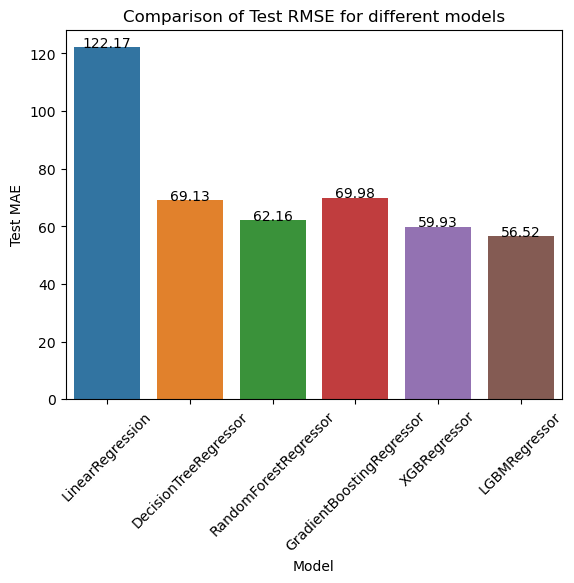

In [72]:
#Compare the performance of the models on the test set.
sns.barplot(data = results_df, x = "Model", y = "Test MAE")
plt.title("Comparison of Test RMSE for different models")
plt.xticks(rotation=45)
for i in range(6):
    plt.text(i, results_df["Test MAE"][i], f"{results_df['Test MAE'][i]:.2f}", ha="center")
plt.show()


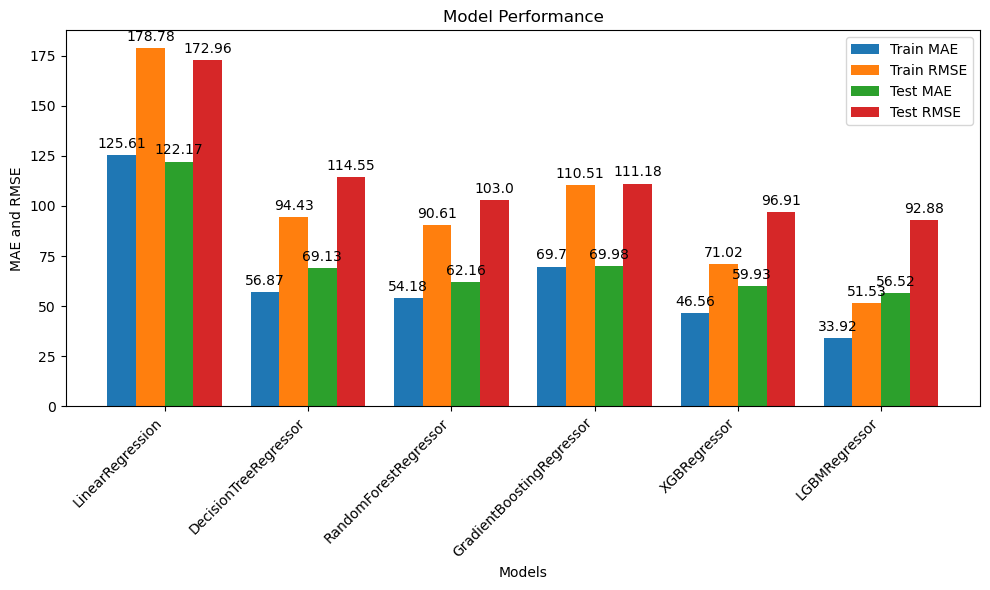

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data from the dataframe
models = results_df['Model'].values
train_mae = results_df['Train MAE'].values
train_rmse = results_df['Train RMSE'].values
test_mae = results_df['Test MAE'].values
test_rmse = results_df['Test RMSE'].values

#Set up the x-axis positions for the groups
x = np.arange(len(models)) * 1.25
width = 0.25  # Adjust the bar width as desired

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Plot the grouped bars
train_mae_bars = ax.bar(x - width*1.5, train_mae, width, label='Train MAE')
train_rmse_bars = ax.bar(x - width/2, train_rmse, width, label='Train RMSE')
test_mae_bars = ax.bar(x + width/2, test_mae, width, label='Test MAE')
test_rmse_bars = ax.bar(x + width*1.5, test_rmse, width, label='Test RMSE')

#add values on top of each bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(train_mae_bars)
add_labels(train_rmse_bars)
add_labels(test_mae_bars)
add_labels(test_rmse_bars)


# Add x-axis labels and tick locations
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Add legend and labels
ax.legend()
ax.set_title('Model Performance')
ax.set_xlabel('Models')
ax.set_ylabel('MAE and RMSE')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Max Voting

In [73]:
from sklearn.ensemble import VotingRegressor
model5 = xgb.XGBRegressor(random_state=1)
model6 = lgbm.LGBMRegressor(num_iterations = 1000, random_state=1)

model_mv = VotingRegressor(estimators=[('xgb', model5), ('lgbm', model6)])
model_mv.fit(X_train, y_train)

maxv_train_preds = model_mv.predict(X_train)
maxv_test_preds = model_mv.predict(X_test)
accuracy = model_mv.score(X_test, y_test)
print(accuracy)
lgbm_results = display_results(model_mv, y_train, maxv_train_preds, y_test, maxv_test_preds)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3209
[LightGBM] [Info] Number of data points in the train set: 40187, number of used features: 29
[LightGBM] [Info] Start training from score 220.589892
0.7225784991680301
Results for VotingRegressor:
Mean Absolute Error for Training data: 39.01159872007138
Root Mean Squared Error for Training data: 59.614999185054494
Mean Absolute Error for Test data: 56.71820966762228
Root Mean Squared Error for Test_data: 93.00526537803333


In [75]:
#Cat Boost
from catboost import CatBoostRegressor
model7 = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
model7.fit(X_train, y_train)
cat_train_preds = model7.predict(X_train)
cat_test_preds = model7.predict(X_test)
accuracy = model7.score(X_test, y_test)
print(accuracy)
cat_results = display_results(model7, y_train, cat_train_preds, y_test, cat_test_preds)


0:	learn: 174.9500020	total: 145ms	remaining: 2m 24s
100:	learn: 106.1744683	total: 1.08s	remaining: 9.59s
200:	learn: 97.5621572	total: 1.98s	remaining: 7.87s
300:	learn: 92.7450129	total: 2.78s	remaining: 6.46s
400:	learn: 89.1049129	total: 3.61s	remaining: 5.4s
500:	learn: 86.1237330	total: 4.42s	remaining: 4.4s
600:	learn: 83.6308781	total: 5.23s	remaining: 3.47s
700:	learn: 81.3080926	total: 5.97s	remaining: 2.55s
800:	learn: 79.3418938	total: 6.73s	remaining: 1.67s
900:	learn: 77.4688213	total: 7.42s	remaining: 815ms
999:	learn: 75.7746498	total: 8.15s	remaining: 0us
0.7191928171900576
Results for CatBoostRegressor:
Mean Absolute Error for Training data: 48.95996603048227
Root Mean Squared Error for Training data: 75.77464978541775
Mean Absolute Error for Test data: 57.52252904637432
Root Mean Squared Error for Test_data: 93.57106749054785
